In [2]:
# importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
!pip install mysql-connector-python

In [48]:
# Importar la biblioteca necesaria
from requests import get

# Obtener la dirección IP pública del entorno de ejecución de Colab
ip = get('https://api64.ipify.org').text

# Imprimir la dirección IP
print('Mi dirección IP es {}'.format(ip))

Mi dirección IP es 34.86.206.145


In [49]:
import mysql.connector

# Configuración de la conexión
host = "35.239.56.194"
user = "Clima1"
password = "Clima123"
database = "Pyropredict"

# Establecer la conexión
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# Crear un cursor
cursor = connection.cursor()

# Ejecutar una consulta de selección
query = "SELECT * FROM Datos_históricos"
cursor.execute(query)

# Obtener los resultados
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
connection.close()

# Crear un DataFrame de pandas
column_names = [i[0] for i in cursor.description]  # Obtener los nombres de las columnas
data = pd.DataFrame(results, columns=column_names)

# Mostrar el DataFrame
data


,id_historicos,Anio,Mes,Region,Temperatura_maxima,Temperatura_media,Humedad,Velocidad_viento,Presion,Cantidad_incendios
0,937,1985,1,Bio_Bio,27.0,20.0,88,11,1021.0,205
1,938,1985,2,Bio_Bio,27.0,18.0,87,12,1019.0,484
2,939,1985,3,Bio_Bio,28.0,19.0,90,11,1022.0,415
3,940,1985,4,Bio_Bio,21.0,15.0,95,10,1029.0,9
4,941,1985,5,Bio_Bio,19.0,14.0,96,16,1023.0,0
...,...,...,...,...,...,...,...,...,...,...
1182,2119,2022,8,valparaiso,25.0,25.0,80,3,1016.0,0
1183,2120,2022,9,valparaiso,23.0,23.0,81,1,1021.0,0
1184,2121,2022,10,valparaiso,27.0,27.0,73,2,1017.0,2
1185,2122,2022,11,valparaiso,30.0,30.0,78,0,1013.0,10


In [50]:
data

,id_historicos,Anio,Mes,Region,Temperatura_maxima,Temperatura_media,Humedad,Velocidad_viento,Presion,Cantidad_incendios
0,937,1985,1,Bio_Bio,27.0,20.0,88,11,1021.0,205
1,938,1985,2,Bio_Bio,27.0,18.0,87,12,1019.0,484
2,939,1985,3,Bio_Bio,28.0,19.0,90,11,1022.0,415
3,940,1985,4,Bio_Bio,21.0,15.0,95,10,1029.0,9
4,941,1985,5,Bio_Bio,19.0,14.0,96,16,1023.0,0
...,...,...,...,...,...,...,...,...,...,...
1182,2119,2022,8,valparaiso,25.0,25.0,80,3,1016.0,0
1183,2120,2022,9,valparaiso,23.0,23.0,81,1,1021.0,0
1184,2121,2022,10,valparaiso,27.0,27.0,73,2,1017.0,2
1185,2122,2022,11,valparaiso,30.0,30.0,78,0,1013.0,10


In [51]:
data = data.drop('id_historicos', axis=1)
data = data.drop('Region', axis=1)
data


,Anio,Mes,Temperatura_maxima,Temperatura_media,Humedad,Velocidad_viento,Presion,Cantidad_incendios
0,1985,1,27.0,20.0,88,11,1021.0,205
1,1985,2,27.0,18.0,87,12,1019.0,484
2,1985,3,28.0,19.0,90,11,1022.0,415
3,1985,4,21.0,15.0,95,10,1029.0,9
4,1985,5,19.0,14.0,96,16,1023.0,0
...,...,...,...,...,...,...,...,...
1182,2022,8,25.0,25.0,80,3,1016.0,0
1183,2022,9,23.0,23.0,81,1,1021.0,0
1184,2022,10,27.0,27.0,73,2,1017.0,2
1185,2022,11,30.0,30.0,78,0,1013.0,10


In [52]:
nuevos_nombres = {'Anio': 'anio', 'Mes': 'mes', 'Temperatura_maxima': 'temp_max', 'Temperatura_media': 'temp_med', 'Humedad': 'humedad', 'Velocidad_viento': 'velocidad_viento', 'Presion': 'presion', 'Cantidad_incendios': 'incendios'}
data.rename(columns=nuevos_nombres, inplace=True)
data

,anio,mes,temp_max,temp_med,humedad,velocidad_viento,presion,incendios
0,1985,1,27.0,20.0,88,11,1021.0,205
1,1985,2,27.0,18.0,87,12,1019.0,484
2,1985,3,28.0,19.0,90,11,1022.0,415
3,1985,4,21.0,15.0,95,10,1029.0,9
4,1985,5,19.0,14.0,96,16,1023.0,0
...,...,...,...,...,...,...,...,...
1182,2022,8,25.0,25.0,80,3,1016.0,0
1183,2022,9,23.0,23.0,81,1,1021.0,0
1184,2022,10,27.0,27.0,73,2,1017.0,2
1185,2022,11,30.0,30.0,78,0,1013.0,10


In [38]:
data.dtypes

anio                 int64
mes                  int64
temp_max            object
temp_med            object
humedad              int64
velocidad_viento     int64
presion             object
incendios            int64
dtype: object

In [53]:
data['temp_max'] = data['temp_max'].astype('int64')
data['temp_med'] = data['temp_med'].astype('int64')
data['presion'] = data['presion'].astype('int64')
data

,anio,mes,temp_max,temp_med,humedad,velocidad_viento,presion,incendios
0,1985,1,27,20,88,11,1021,205
1,1985,2,27,18,87,12,1019,484
2,1985,3,28,19,90,11,1022,415
3,1985,4,21,15,95,10,1029,9
4,1985,5,19,14,96,16,1023,0
...,...,...,...,...,...,...,...,...
1182,2022,8,25,25,80,3,1016,0
1183,2022,9,23,23,81,1,1021,0
1184,2022,10,27,27,73,2,1017,2
1185,2022,11,30,30,78,0,1013,10


In [54]:
data.dtypes

anio                int64
mes                 int64
temp_max            int64
temp_med            int64
humedad             int64
velocidad_viento    int64
presion             int64
incendios           int64
dtype: object

In [55]:
#Estadistica de datos
data.describe()

,anio,mes,temp_max,temp_med,humedad,velocidad_viento,presion,incendios
count,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000
mean,2005.259478,6.504634,25.555181,19.626790,87.533277,7.404381,1020.758214,92.735468
std,10.602431,3.451266,5.176736,5.548473,9.676532,3.479390,5.156538,171.996448
min,1985.000000,1.000000,14.000000,10.000000,9.000000,0.000000,1003.000000,0.000000
25%,1997.000000,4.000000,21.000000,15.000000,80.000000,5.000000,1017.000000,0.000000
50%,2006.000000,7.000000,26.000000,19.000000,90.000000,7.000000,1021.000000,15.000000
75%,2014.000000,9.500000,29.000000,24.000000,96.000000,10.000000,1024.500000,84.500000
max,2022.000000,12.000000,37.000000,35.000000,100.000000,20.000000,1035.000000,1022.000000


In [56]:
dataplt=data
dataplt

,anio,mes,temp_max,temp_med,humedad,velocidad_viento,presion,incendios
0,1985,1,27,20,88,11,1021,205
1,1985,2,27,18,87,12,1019,484
2,1985,3,28,19,90,11,1022,415
3,1985,4,21,15,95,10,1029,9
4,1985,5,19,14,96,16,1023,0
...,...,...,...,...,...,...,...,...
1182,2022,8,25,25,80,3,1016,0
1183,2022,9,23,23,81,1,1021,0
1184,2022,10,27,27,73,2,1017,2
1185,2022,11,30,30,78,0,1013,10


In [57]:
data.isna().sum()

anio                0
mes                 0
temp_max            0
temp_med            0
humedad             0
velocidad_viento    0
presion             0
incendios           0
dtype: int64

In [58]:
data = data.dropna()
data.isna().sum()

anio                0
mes                 0
temp_max            0
temp_med            0
humedad             0
velocidad_viento    0
presion             0
incendios           0
dtype: int64

In [59]:
data

,anio,mes,temp_max,temp_med,humedad,velocidad_viento,presion,incendios
0,1985,1,27,20,88,11,1021,205
1,1985,2,27,18,87,12,1019,484
2,1985,3,28,19,90,11,1022,415
3,1985,4,21,15,95,10,1029,9
4,1985,5,19,14,96,16,1023,0
...,...,...,...,...,...,...,...,...
1182,2022,8,25,25,80,3,1016,0
1183,2022,9,23,23,81,1,1021,0
1184,2022,10,27,27,73,2,1017,2
1185,2022,11,30,30,78,0,1013,10


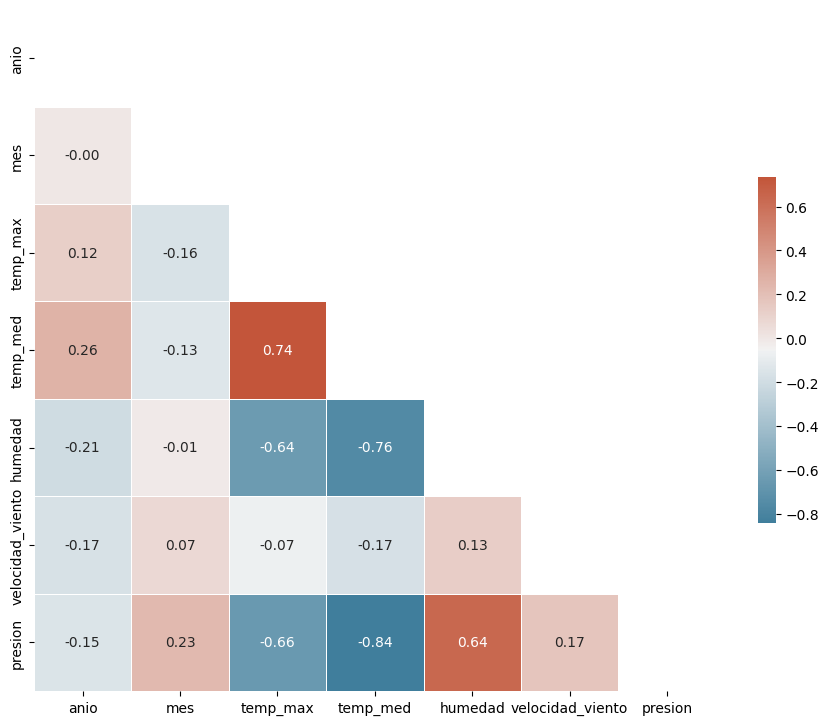

In [60]:
# =============================================================================
# Correlacion
# =============================================================================

# Importar las bibliotecas necesarias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr = data.set_index('incendios').corr()

# Para excluir las correlaciones duplicadas
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Tamaño de la Figura
f, ax = plt.subplots(figsize=(11, 9))

# Generar paleta de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Mapa de calor con el Mask correcto y anotaciones de correlación
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()

# PREDICCION CON REGRESION LINEAL


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df5 = data
df5

,anio,mes,temp_max,temp_med,humedad,velocidad_viento,presion,incendios
0,1985,1,27,20,88,11,1021,205
1,1985,2,27,18,87,12,1019,484
2,1985,3,28,19,90,11,1022,415
3,1985,4,21,15,95,10,1029,9
4,1985,5,19,14,96,16,1023,0
...,...,...,...,...,...,...,...,...
1182,2022,8,25,25,80,3,1016,0
1183,2022,9,23,23,81,1,1021,0
1184,2022,10,27,27,73,2,1017,2
1185,2022,11,30,30,78,0,1013,10


In [71]:
# Dividir el DataFrame en variables predictoras (X) y la variable objetivo (y)
X = df5[['anio', 'mes','temp_max','temp_med','humedad','velocidad_viento','presion']]
y = df5['incendios']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear e entrenar un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo.predict(X_prueba)

# Calcular el R-cuadrado
r2 = r2_score(y_prueba, predicciones)
print(f"R-cuadrado: {r2}")

R-cuadrado: 0.3338600086589759


Prediccion promedio de temperatura maxima

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Crea un DataFrame vacío para almacenar las predicciones
predicciones_df = pd.DataFrame(columns=['anio', 'mes', 'temp_max_predicciones'])

# Realizar un ciclo for de 6 repeticiones para predecir meses consecutivos
for i in range(12):
    # Dividir el DataFrame en variables predictoras (X) y la variable objetivo (y)
    X = df5[['anio', 'mes','temp_med','humedad','velocidad_viento','presion','incendios']]
    y = df5['temp_max']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

    # Crear e entrenar un modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Hacer predicciones para el siguiente mes
    ultima_fila = df5.iloc[-1]
    siguiente_mes = ultima_fila.copy()
    siguiente_mes['mes'] += 1
    if siguiente_mes['mes'] > 12:
        siguiente_mes['mes'] = 1
        siguiente_mes['anio'] += 1
    predicciones = modelo.predict([siguiente_mes.drop('temp_max')])

    # Agregar la predicción al DataFrame
    predicciones_df = predicciones_df.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'temp_max_predicciones': predicciones[0]}, ignore_index=True)

    # Actualizar los datos para el siguiente mes
    df5 = df5.append(siguiente_mes, ignore_index=True)

# Imprimir el DataFrame con las predicciones
predicciones_df = predicciones_df.drop(['anio','mes'], axis=1)
print(predicciones_df)


    temp_max_predicciones
0               34.750872
1               34.653506
2               34.268190
3               34.257295
4               34.754066
5               34.577746
6               34.530877
7               34.804536
8               34.600357
9               34.466460
10              34.422934
11              34.384942


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-72-1d4ae141b856>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df = predicciones_df.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'temp_max_predicciones': predicciones[0]}, ignore_index=True)
<ipython-input-72-1d4ae141b856>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(siguiente_mes, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-72-1d4ae141b856>:31: FutureWarning: The frame.append method is depreca

Prediccion promedio de temperatura media

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Crea un DataFrame vacío para almacenar las predicciones
predicciones_df1 = pd.DataFrame(columns=['anio', 'mes', 'temp_med_predicciones'])

# Realizar un ciclo for de 6 repeticiones para predecir meses consecutivos
for i in range(12):
    # Dividir el DataFrame en variables predictoras (X) y la variable objetivo (y)
    X = df5[['anio', 'mes', 'temp_max', 'humedad','velocidad_viento', 'presion', 'incendios']]
    y = df5['temp_med']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

    # Crear e entrenar un modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Hacer predicciones para el siguiente mes
    ultima_fila = df5.iloc[-1]
    siguiente_mes = ultima_fila.copy()
    siguiente_mes['mes'] += 1
    if siguiente_mes['mes'] > 12:
        siguiente_mes['mes'] = 1
        siguiente_mes['anio'] += 1
    predicciones = modelo.predict([siguiente_mes.drop('temp_med')])

    # Agregar la predicción al DataFrame
    predicciones_df1 = predicciones_df1.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'temp_med_predicciones': predicciones[0]}, ignore_index=True)

    # Actualizar los datos para el siguiente mes
    df5 = df5.append(siguiente_mes, ignore_index=True)

# Imprimir el DataFrame con las predicciones
predicciones_df1 = predicciones_df1.drop(['anio','mes'], axis=1)
print(predicciones_df1)

    temp_med_predicciones
0               29.666043
1               29.676888
2               29.645462
3               30.262487
4               29.582251
5               29.914334
6               30.028362
7               30.083300
8               29.979666
9               29.951235
10              29.963998
11              30.094766


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-73-7b8f81c96f6f>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df1 = predicciones_df1.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'temp_med_predicciones': predicciones[0]}, ignore_index=True)
<ipython-input-73-7b8f81c96f6f>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(siguiente_mes, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-73-7b8f81c96f6f>:31: FutureWarning: The frame.append method is depre

Prediccion humedad

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Crea un DataFrame vacío para almacenar las predicciones
predicciones_df2 = pd.DataFrame(columns=['anio', 'mes', 'humedad_predicciones'])

# Realizar un ciclo for de 6 repeticiones para predecir meses consecutivos
for i in range(12):
    # Dividir el DataFrame en variables predictoras (X) y la variable objetivo (y)
    X = df5[['anio', 'mes', 'temp_max', 'temp_med','velocidad_viento', 'presion', 'incendios']]
    y = df5['humedad']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

    # Crear e entrenar un modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Hacer predicciones para el siguiente mes
    ultima_fila = df5.iloc[-1]
    siguiente_mes = ultima_fila.copy()
    siguiente_mes['mes'] += 1
    if siguiente_mes['mes'] > 12:
        siguiente_mes['mes'] = 1
        siguiente_mes['anio'] += 1
    predicciones = modelo.predict([siguiente_mes.drop('humedad')])

    # Agregar la predicción al DataFrame
    predicciones_df2 = predicciones_df2.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'humedad_predicciones': predicciones[0]}, ignore_index=True)

    # Actualizar los datos para el siguiente mes
    df5 = df5.append(siguiente_mes, ignore_index=True)

# Imprimir el DataFrame con las predicciones
predicciones_df2 = predicciones_df2.drop(['anio','mes'], axis=1)
print(predicciones_df2)

    humedad_predicciones
0              71.049688
1              70.196328
2              69.786155
3              70.042180
4              69.609450
5              68.679127
6              68.765340
7              68.164538
8              67.898817
9              67.952736
10             67.739359
11             67.225323


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-74-daac91effb65>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df2 = predicciones_df2.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'humedad_predicciones': predicciones[0]}, ignore_index=True)
<ipython-input-74-daac91effb65>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(siguiente_mes, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-74-daac91effb65>:31: FutureWarning: The frame.append method is deprec

Prediccion velocidad viento

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Crea un DataFrame vacío para almacenar las predicciones
predicciones_df3 = pd.DataFrame(columns=['anio', 'mes', 'velocidad_viento_predicciones'])

# Realizar un ciclo for de 6 repeticiones para predecir meses consecutivos
for i in range(12):
    # Dividir el DataFrame en variables predictoras (X) y la variable objetivo (y)
    X = df5[['anio', 'mes', 'temp_max','temp_med', 'humedad','presion','incendios']]
    y = df5['velocidad_viento']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

    # Crear e entrenar un modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Hacer predicciones para el siguiente mes
    ultima_fila = df5.iloc[-1]
    siguiente_mes = ultima_fila.copy()
    siguiente_mes['mes'] += 1
    if siguiente_mes['mes'] > 12:
        siguiente_mes['mes'] = 1
        siguiente_mes['anio'] += 1
    predicciones = modelo.predict([siguiente_mes.drop('velocidad_viento')])

    # Agregar la predicción al DataFrame
    predicciones_df3 = predicciones_df3.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'velocidad_viento_predicciones': predicciones[0]}, ignore_index=True)

    # Actualizar los datos para el siguiente mes
    df5 = df5.append(siguiente_mes, ignore_index=True)

# Imprimir el DataFrame con las predicciones
predicciones_df3 = predicciones_df3.drop(['anio','mes'], axis=1)
print(predicciones_df3)

    velocidad_viento_predicciones
0                        3.009742
1                        3.246391
2                        3.449690
3                        3.699835
4                        3.701248
5                        3.839135
6                        3.856492
7                        3.943198
8                        3.931673
9                        4.215897
10                       4.446644
11                       4.667767


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-75-1ecd9dcfa19b>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df3 = predicciones_df3.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'velocidad_viento_predicciones': predicciones[0]}, ignore_index=True)
<ipython-input-75-1ecd9dcfa19b>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(siguiente_mes, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-75-1ecd9dcfa19b>:31: FutureWarning: The frame.append method 

Prediccion presion

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Crea un DataFrame vacío para almacenar las predicciones
predicciones_df4 = pd.DataFrame(columns=['anio', 'mes', 'presion_predicciones'])

# Realizar un ciclo for de 6 repeticiones para predecir meses consecutivos
for i in range(12):
    # Dividir el DataFrame en variables predictoras (X) y la variable objetivo (y)
    X = df5[['anio', 'mes', 'temp_max','temp_med', 'humedad','velocidad_viento','incendios']]
    y = df5['presion']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

    # Crear e entrenar un modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Hacer predicciones para el siguiente mes
    ultima_fila = df5.iloc[-1]
    siguiente_mes = ultima_fila.copy()
    siguiente_mes['mes'] += 1
    if siguiente_mes['mes'] > 12:
        siguiente_mes['mes'] = 1
        siguiente_mes['anio'] += 1
    predicciones = modelo.predict([siguiente_mes.drop('presion')])

    # Agregar la predicción al DataFrame
    predicciones_df4= predicciones_df4.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'presion_predicciones': predicciones[0]}, ignore_index=True)

    # Actualizar los datos para el siguiente mes
    df5 = df5.append(siguiente_mes, ignore_index=True)

# Imprimir el DataFrame con las predicciones
predicciones_df4 = predicciones_df4.drop(['anio','mes'], axis=1)
print(predicciones_df4)

    presion_predicciones
0            1011.100158
1            1011.412834
2            1011.457550
3            1011.482355
4            1011.588277
5            1012.040790
6            1011.825904
7            1012.137119
8            1012.276482
9            1012.436072
10           1012.586203
11           1012.640585


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-76-db935cf50ebd>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df4= predicciones_df4.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'presion_predicciones': predicciones[0]}, ignore_index=True)
<ipython-input-76-db935cf50ebd>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(siguiente_mes, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-76-db935cf50ebd>:31: FutureWarning: The frame.append method is depreca

Prediccion incendios

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Crea un DataFrame vacío para almacenar las predicciones
predicciones_df5 = pd.DataFrame(columns=['anio', 'mes', 'incendios_predicciones'])

# Realizar un ciclo for de 6 repeticiones para predecir meses consecutivos
for i in range(12):
    # Dividir el DataFrame en variables predictoras (X) y la variable objetivo (y)
    X = df5[['anio', 'mes', 'temp_max', 'temp_med', 'humedad','velocidad_viento', 'presion']]
    y = df5['incendios']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

    # Crear e entrenar un modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_entrenamiento, y_entrenamiento)

    # Hacer predicciones para el siguiente mes
    ultima_fila = df5.iloc[-1]
    siguiente_mes = ultima_fila.copy()
    siguiente_mes['mes'] += 1
    if siguiente_mes['mes'] > 12:
        siguiente_mes['mes'] = 1
        siguiente_mes['anio'] += 1
    predicciones = modelo.predict([siguiente_mes.drop('incendios')])

    # Agregar la predicción al DataFrame
    predicciones_df5 = predicciones_df5.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'incendios_predicciones': predicciones[0]}, ignore_index=True)

    # Actualizar los datos para el siguiente mes
    df5 = df5.append(siguiente_mes, ignore_index=True)

# Imprimir el DataFrame con las predicciones
predicciones_df5 = predicciones_df5.drop(['anio','mes'], axis=1)
predicciones_df5['incendios_predicciones'] = predicciones_df5['incendios_predicciones'].abs()
print(predicciones_df5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-79-cba54bd7076c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df5 = predicciones_df5.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'incendios_predicciones': predicciones[0]}, ignore_index=True)
<ipython-input-79-cba54bd7076c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(siguiente_mes, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-79-cba54bd7076c>:31: FutureWarning: The frame.append method is depr

    incendios_predicciones
0                60.395492
1                43.487654
2                28.471100
3                22.905988
4                 9.174082
5                 1.496507
6                16.902332
7                30.109260
8                42.697081
9                54.967074
10               69.945755
11               83.036994


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-79-cba54bd7076c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicciones_df5 = predicciones_df5.append({'anio': siguiente_mes['anio'], 'mes': siguiente_mes['mes'], 'incendios_predicciones': predicciones[0]}, ignore_index=True)
<ipython-input-79-cba54bd7076c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(siguiente_mes, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-79-cba54bd7076c>:31: FutureWarning: The frame.append method is depr

In [97]:
data_predict = {'id': ['0','1', '2', '3', '4','5', '6', '7', '8','9', '10', '11'],'anio': ['2023','2023','2023','2023','2023','2023','2023','2023','2023','2023','2023','2023'],'mes': ['1', '2', '3', '4','5', '6', '7', '8','9', '10', '11', '12'],}
df_predict = pd.DataFrame(data_predict)
df_predict

,id,anio,mes
0,0,2023,1
1,1,2023,2
2,2,2023,3
3,3,2023,4
4,4,2023,5
5,5,2023,6
6,6,2023,7
7,7,2023,8
8,8,2023,9
9,9,2023,10


In [98]:
df_predict1=pd.concat([df_predict, predicciones_df,predicciones_df1,predicciones_df2,predicciones_df3,predicciones_df4,predicciones_df5],axis=1)
df_predict1

,id,anio,mes,temp_max_predicciones,temp_med_predicciones,humedad_predicciones,velocidad_viento_predicciones,presion_predicciones,incendios_predicciones
0,0,2023,1,34.750872,29.666043,71.049688,3.009742,1011.100158,60.395492
1,1,2023,2,34.653506,29.676888,70.196328,3.246391,1011.412834,43.487654
2,2,2023,3,34.268190,29.645462,69.786155,3.449690,1011.457550,28.471100
3,3,2023,4,34.257295,30.262487,70.042180,3.699835,1011.482355,22.905988
4,4,2023,5,34.754066,29.582251,69.609450,3.701248,1011.588277,9.174082
5,5,2023,6,34.577746,29.914334,68.679127,3.839135,1012.040790,1.496507
6,6,2023,7,34.530877,30.028362,68.765340,3.856492,1011.825904,16.902332
7,7,2023,8,34.804536,30.083300,68.164538,3.943198,1012.137119,30.109260
8,8,2023,9,34.600357,29.979666,67.898817,3.931673,1012.276482,42.697081
9,9,2023,10,34.466460,29.951235,67.952736,4.215897,1012.436072,54.967074


In [102]:
df_predict1 = df_predict1.round(decimals=0)
df_predict1 = df_predict1.reset_index(drop=True)
df_predict1

,id,anio,mes,temp_max_predicciones,temp_med_predicciones,humedad_predicciones,velocidad_viento_predicciones,presion_predicciones,incendios_predicciones
0,0,2023,1,35.0,30.0,71.0,3.0,1011.0,60.0
1,1,2023,2,35.0,30.0,70.0,3.0,1011.0,43.0
2,2,2023,3,34.0,30.0,70.0,3.0,1011.0,28.0
3,3,2023,4,34.0,30.0,70.0,4.0,1011.0,23.0
4,4,2023,5,35.0,30.0,70.0,4.0,1012.0,9.0
5,5,2023,6,35.0,30.0,69.0,4.0,1012.0,1.0
6,6,2023,7,35.0,30.0,69.0,4.0,1012.0,17.0
7,7,2023,8,35.0,30.0,68.0,4.0,1012.0,30.0
8,8,2023,9,35.0,30.0,68.0,4.0,1012.0,43.0
9,9,2023,10,34.0,30.0,68.0,4.0,1012.0,55.0


In [103]:
# Nombre de la nueva tabla en la base de datos
nueva_tabla = "data_predict"

# Crear una nueva tabla en la base de datos
cursor = connection.cursor()

delete_table_query = f"""
DROP TABLE IF EXISTS {nueva_tabla};
"""

cursor.execute(delete_table_query)
connection.commit()

create_table_query = f"""
CREATE TABLE {nueva_tabla} (
    id INT,
    anio INT,
    mes INT,
    temp_max_predicciones INT,
    temp_med_predicciones INT,
    humedad_predicciones INT,
    velocidad_viento_predicciones INT,
    presion_predicciones INT,
    incendios_predicciones INT
);
"""
cursor.execute(create_table_query)
connection.commit()
cursor.close()

# Guardar el DataFrame en la nueva tabla
df_predict1.to_sql(name=nueva_tabla, con=connection, if_exists="replace", index=False)

# Cerrar la conexión
connection.close()

<ipython-input-103-e78c0e343b90>:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_predict1.to_sql(name=nueva_tabla, con=connection, if_exists="replace", index=False)


DatabaseError: ignored